In [ ]:
pip install --upgrade imutils 

Requirement already up-to-date: imutils in /home/sergey/.local/lib/python3.8/site-packages (0.5.4)


In [ ]:
pip install opencv-python

In [ ]:
pip install --upgrade scikit-learn 

In [ ]:
pip install --upgrade matplotlib


In [ ]:
pip install numpy

In [ ]:
pip install tensorflow

In [ ]:
pip install keras

In [1]:
import matplotlib
matplotlib.use("Agg")
 
# подключаем необходимые пакеты
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os 
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing import image

from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dataset = image_dataset_from_directory('aaa/',
                                             subset='training',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=56,
                                             image_size=(52, 56))

class_names = train_dataset.class_names
class_names


2022-01-18 23:41:53.240426: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-18 23:41:53.240476: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
data = []
labels = []
 
imagePaths = sorted(list(paths.list_images("aaa/")))
random.seed(42)
random.shuffle(imagePaths)
 
for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (26, 28)).flatten()
    data.append(image) 
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label) 

[INFO] loading images...
[106 106 106 ... 211 211 211]
[184 184 184 ... 148 148 148]
[222 222 222 ... 213 213 213]
[230 230 230 ... 229 229 229]
[221 221 221 ... 209 209 209]
[222 222 222 ... 193 193 193]
[203 203 203 ... 120 120 120]
[231 231 231 ... 221 221 221]
[124  31 198 ...  73  69  93]
[205 205 205 ... 226 226 226]
[210 210 210 ... 116 116 116]
[123 162 251 ... 119 223 242]
[240 240 240 ...  94  94  94]
[211 211 211 ... 216 216 216]
[100  47  95 ... 206 189 212]
[212 205 185 ... 122 201 181]
[200 200 200 ... 232 232 232]
[232 232 232 ... 221 221 221]
[220 220 220 ...  62  62  62]
[222 222 222 ... 229 229 229]
[239 239 239 ...  93  93  93]
[241 241 241 ... 188 188 188]
[231 231 231 ... 221 221 221]
[240 240 240 ... 122 122 122]
[255 241 201 ... 227 193 128]
[235 187 186 ... 187 103  98]
[209 209 209 ... 103 103 103]
[ 85 230 255 ...  23  42 107]
[205 205 205 ...  53  53  53]
[227 227 227 ... 142 142 142]
[255 223 146 ...  65  99 157]
[191 191 191 ...  39  39  39]
[181 181 181 ..

[245 245 245 ... 155 155 155]
[230 170  70 ... 102  94  93]
[ 80 191 113 ...  79 184 106]
[240 240 240 ... 200 200 200]
[192 192 192 ...  65  65  65]
[ 44  69 110 ... 160 156  69]
[239 239 239 ... 242 242 242]
[235 235 235 ... 204 204 204]
[229 229 229 ... 227 227 227]
[231 231 231 ... 221 221 221]
[185 185 185 ... 226 226 226]
[180 180 180 ...  82  82  82]
[210 210 210 ... 205 205 205]
[205 205 205 ... 175 175 175]
[200 200 200 ...  74  74  74]
[141 141 141 ...  79  79  79]
[199 199 199 ... 178 178 178]
[183 183 183 ... 215 215 215]
[217 217 217 ...  55  55  55]
[245 245 245 ... 206 206 206]
[215 215 215 ...  93  93  93]
[219 219 219 ... 203 203 203]
[100  47  95 ... 206 189 212]
[219 219 219 ... 184 184 184]
[207 207 207 ... 245 245 245]
[131 131 131 ... 164 164 164]
[82 22 54 ... 36 26 72]
[220 220 220 ... 233 233 233]
[213 213 213 ... 198 198 198]
[189 189 189 ... 180 180 180]
[178 178 178 ...  41  41  41]
[181 181 181 ...  98  98  98]
[211 211 211 ... 110 110 110]
[222 222 222 ...

[ 70  54  24 ... 154 102  16]
[187 187 187 ...  48  48  48]
[216 216 216 ... 124 124 124]
[240 240 240 ... 233 233 233]
[221 221 221 ... 209 209 209]
[239 239 239 ...  93  93  93]
[228 228 228 ... 217 217 217]
[222 222 222 ... 141 141 141]
[236 236 236 ...  72  72  72]
[240 240 240 ...  94  94  94]
[ 73 144  76 ...  72 123  38]
[230 230 230 ... 185 185 185]
[222 222 222 ... 146 146 146]
[191 191 191 ... 129 129 129]
[238 238 238 ... 125 125 125]
[187 187 187 ... 212 212 212]
[236 236 236 ... 189 189 189]
[213 213 213 ... 192 192 192]
[241 140 169 ... 170  44 135]
[171 171 171 ...  49  49  49]
[178 178 178 ...  41  41  41]
[218 218 218 ... 149 149 149]
[191 191 191 ... 178 178 178]
[191 191 191 ...  40  40  40]
[191 191 191 ...  39  39  39]
[233 233 233 ... 212 212 212]
[212 212 212 ... 206 206 206]
[230 230 230 ... 185 185 185]
[202 202 202 ...  40  40  40]
[225 225 225 ... 109 109 109]
[230 230 230 ... 185 185 185]
[100  47  95 ... 206 189 212]
[102  47  95 ... 202 182 208]
[199 199 1

[231 231 231 ... 179 179 179]
[204 204 204 ... 100 100 100]
[224 224 224 ...  82  82  82]
[215 215 215 ...  95  95  95]
[238 238 238 ... 157 157 157]
[240 240 240 ...  94  94  94]
[232 157 187 ... 139  24  84]
[247 247 247 ... 198 198 198]
[229 229 229 ...  48  48  48]
[212 212 212 ... 240 240 240]
[243 243 243 ... 195 195 195]
[222 222 222 ... 193 193 193]
[242 215 190 ... 253 194 125]
[231 231 231 ... 125 125 125]
[83 78 78 ... 94 89 94]
[100  47  95 ... 206 189 212]
[239 239 239 ...  93  93  93]
[255 223 145 ...  70 101 155]
[219 219 219 ... 177 177 177]
[201 201 201 ... 137 137 137]
[231 231 231 ... 138 138 138]
[187 187 187 ... 218 218 218]
[243 243 243 ... 179 179 179]
[191 191 191 ... 183 183 183]
[212 212 212 ... 239 239 239]
[206 206 206 ... 105 105 105]
[229 229 229 ...  48  48  48]
[200 200 200 ...  74  74  74]
[200 200 200 ... 216 216 216]
[140 119  42 ...  77 103 111]
[219 219 219 ... 200 200 200]
[229 229 229 ... 180 180 180]
[186 186 186 ... 181 181 181]
[202 202 202 ...

[155 155 155 ... 149 149 149]
[214 138   9 ...  87 109 139]
[205 205 205 ... 175 175 175]
[219 219 219 ... 219 219 219]
[240 240 240 ...  94  94  94]
[207 207 207 ... 200 200 200]
[ 80 191 113 ...  79 184 106]
[184 154  97 ... 197 163 146]
[255 223 147 ...  58  93 142]
[207 207 207 ... 200 200 200]
[195 195 195 ... 185 185 185]
[210 210 210 ... 110 110 110]
[239 239 239 ... 242 242 242]
[238 238 238 ... 114 114 114]
[240 240 240 ... 197 197 197]
[236 236 236 ... 190 190 190]
[229 229 229 ... 227 227 227]
[202 202 202 ... 201 201 201]
[214 214 214 ... 185 185 185]
[228 228 228 ... 102 102 102]
[199 195 189 ...  78 231 254]
[108 176 133 ...  40 109 144]
[189 189 189 ... 178 178 178]
[179 179 179 ...  20  20  20]
[188 188 188 ... 211 211 211]
[243 243 243 ...  90  90  90]
[243 243 243 ... 121 121 121]
[231 231 231 ... 241 241 241]
[165 118  75 ... 189 203 186]
[239 239 239 ... 195 195 195]
[200 200 200 ...  74  74  74]
[207 203 196 ...  79 232 254]
[191 191 191 ...  29  29  29]
[144 144 1

[230 230 230 ...  43  43  43]
[233 233 233 ...  96  96  96]
[197 197 197 ... 177 177 177]
[196 196 196 ...  44  44  44]
[ 60  60  60 ... 176 176 176]
[171 171 171 ...  49  49  49]
[52 36 33 ... 96 49 45]
[182 182 182 ... 211 211 211]
[250 244 200 ... 248 243 240]
[189 189 189 ...  51  51  51]
[202 202 202 ...  40  40  40]
[201 201 201 ... 211 211 211]
[222 222 222 ... 146 146 146]
[215 215 215 ... 174 174 174]
[233 233 233 ... 186 186 186]
[95 95 95 ... 62 62 62]
[233 233 233 ... 197 197 197]
[195 195 195 ... 228 228 228]
[187 187 187 ... 212 212 212]
[230 230 230 ... 185 185 185]
[ 58 181 246 ...  33  85 226]
[183 183 183 ... 189 189 189]
[154 154 154 ... 153 153 153]
[ 12  12  12 ... 114 114 114]
[213 213 213 ... 192 192 192]
[231 231 231 ...  44  44  44]
[94 94 94 ... 74 74 74]
[191 191 191 ...  54  54  54]
[218 218 218 ... 149 149 149]
[194 194 194 ... 221 221 221]
[212 212 212 ... 216 216 216]
[190 158  91 ...  48  66 117]
[191 191 191 ...  45  45  45]
[222 222 222 ... 141 141 141

[226 226 226 ... 199 199 199]
[169 169 169 ... 141 141 141]
[231 231 231 ... 221 221 221]
[181 181 181 ...  26  26  26]
[247 247 247 ... 180 180 180]
[231 231 231 ... 221 221 221]
[233 233 233 ...  96  96  96]
[219 219 219 ... 177 177 177]
[225 225 225 ...  26  26  26]
[191 191 191 ...  45  45  45]
[197 197 197 ...  62  62  62]
[199 199 199 ...  74  74  74]
[200 200 200 ... 103 103 103]
[222 222 222 ... 146 146 146]
[230 230 230 ...  43  43  43]
[240 240 240 ... 193 193 193]
[191 191 191 ... 180 180 180]
[187 187 187 ...  42  42  42]
[233 233 233 ...  96  96  96]
[234 234 234 ... 188 188 188]
[171 171 171 ...  49  49  49]
[124  31 198 ...  73  69  93]
[199 199 199 ... 178 178 178]
[230 230 230 ... 203 203 203]
[240 240 240 ... 193 193 193]
[190 190 190 ...  52  52  52]
[222 222 222 ... 146 146 146]
[186 186 186 ... 107 107 107]
[113 176 137 ...  43  98 135]
[201 201 201 ... 143 143 143]
[177 177 177 ... 224 224 224]
[187 187 187 ... 212 212 212]
[198 198 198 ... 218 218 218]
[243 243 2

[100 158 255 ... 154 149 136]
[199 199 199 ... 178 178 178]
[187 187 187 ...  42  42  42]
[224 224 224 ... 183 183 183]
[212 212 212 ... 120 120 120]
[ 98  98  98 ... 103 103 103]
[70 70 70 ... 81 81 81]
[220 220 220 ...  61  61  61]
[189 189 189 ... 193 193 193]
[247 247 247 ... 198 198 198]
[143 143 143 ... 113 113 113]
[72 63 41 ... 72 67 62]
[171 171 171 ...  49  49  49]
[202 202 202 ... 201 201 201]
[226 226 226 ... 199 199 199]
[231 231 231 ... 182 182 182]
[109 100  97 ... 120 115 120]
[215 215 215 ... 241 241 241]
[219 219 219 ... 103 103 103]
[177 177 177 ... 179 179 179]
[164 103  79 ...  79  72  78]
[229 229 229 ... 227 227 227]
[243 243 243 ...  90  90  90]
[222 222 222 ...  89  89  89]
[218 218 218 ...  82  82  82]
[241 241 241 ...  80  80  80]
[239 239 239 ...  93  93  93]
[255 145 255 ... 175  75 162]
[213 213 213 ...  94  94  94]
[178 178 178 ...  41  41  41]
[ 38  38  38 ... 174 174 174]
[215 215 215 ... 241 241 241]
[213 213 213 ...  94  94  94]
[227 227 227 ...  65  

[192 192 192 ...  25  25  25]
[187 187 187 ... 169 169 169]
[238 238 238 ... 137 137 137]
[197 197 197 ... 186 186 186]
[218 218 218 ... 149 149 149]
[164 102  80 ...  77  72  77]
[247 247 247 ... 234 234 234]
[255 231 182 ... 252 204 174]
[222 222 222 ... 215 215 215]
[189 189 189 ... 178 178 178]
[200 200 200 ...  74  74  74]
[247 247 247 ... 198 198 198]
[222 222 222 ... 145 145 145]
[203 203 203 ...  40  40  40]
[191 191 191 ...  40  40  40]
[183 183 183 ... 147 147 147]
[204 204 204 ... 196 196 196]
[244 145 176 ... 175  47 137]
[191 191 191 ... 146 146 146]
[177 177 177 ... 172 172 172]
[187 187 187 ... 198 198 198]
[192 192 192 ...  48  48  48]
[171 171 171 ...  49  49  49]
[230 230 230 ...  58  58  58]
[182 182 182 ... 200 200 200]
[232 232 232 ... 242 242 242]
[153 153 153 ...  55  55  55]
[201 169  76 ... 109 122 179]
[ 86  61 213 ... 255 211 163]
[134 134 134 ...  92  92  92]
[233 233 233 ... 186 186 186]
[165 165 165 ... 127 127 127]
[229 229 229 ...  48  48  48]
[222 222 2

[222 222 222 ... 193 193 193]
[95 95 95 ... 73 73 73]
[221 221 221 ...  91  91  91]
[240 240 240 ... 197 197 197]
[177 177 177 ... 185 185 185]
[222 222 222 ...  88  88  88]
[174 144  98 ...  86 104 155]
[184 184 184 ...  66  66  66]
[182 182 182 ...  80  80  80]
[134 134 134 ... 117 117 117]
[78 78 78 ... 54 54 54]
[255 231 182 ... 252 204 174]
[232 232 232 ... 221 221 221]
[112  94  25 ... 123 134  76]
[174 145  85 ... 196 168 114]
[ 85 197 114 ...  85 191 111]
[200 200 200 ... 151 151 151]
[234 234 234 ... 104 104 104]
[230 230 230 ... 229 229 229]
[211 211 211 ... 241 241 241]
[240 240 240 ... 193 193 193]
[217 217 217 ... 183 183 183]
[191 191 191 ...  54  54  54]
[209 209 209 ... 200 200 200]
[ 63 105 179 ... 146  43  76]
[202 202 202 ...  72  72  72]
[195 195 195 ... 185 185 185]
[219 219 219 ... 201 201 201]
[213 213 213 ...  94  94  94]
[218 218 218 ...  90  90  90]
[247 247 247 ... 234 234 234]
[235 235 235 ... 122 122 122]
[177 177 177 ... 224 224 224]
[77 77 77 ... 47 47 47

[191 191 191 ...  54  54  54]
[178 178 178 ...  41  41  41]
[240 240 240 ... 200 200 200]
[199 199 199 ... 178 178 178]
[222 222 222 ... 141 141 141]
[191 191 191 ...  45  45  45]
[196 196 196 ...  77  77  77]
[204 204 204 ... 100 100 100]
[247 247 247 ... 180 180 180]
[130 130 130 ...  78  78  78]
[236 236 236 ...  72  72  72]
[220 220 220 ...  62  62  62]
[100  47  95 ... 206 189 212]
[222 222 222 ... 193 193 193]
[211 211 211 ... 223 223 223]
[220 220 220 ... 233 233 233]
[235 235 235 ... 215 215 215]
[186 186 186 ... 228 228 228]
[192 192 192 ...  44  44  44]
[214 214 214 ... 101 101 101]
[187 192 199 ...  71  56 105]
[255 223 147 ...  58  93 142]
[229 229 229 ... 122 122 122]
[115  52 114 ...  15  22  48]
[189 189 189 ...  83  83  83]
[203 203 203 ... 209 209 209]
[218 218 218 ... 243 243 243]
[197 197 197 ... 210 210 210]
[212 212 212 ... 106 106 106]
[185 185 185 ...  55  55  55]
[211 211 211 ... 168 168 168]
[180 180 180 ...  82  82  82]
[229 229 229 ...  48  48  48]
[215 215 2

[194 194 194 ... 189 189 189]
[226 226 226 ... 199 199 199]
[191 191 191 ...  40  40  40]
[222 222 222 ... 177 177 177]
[247 247 247 ... 198 198 198]
[187 187 187 ... 238 238 238]
[221 221 221 ...  37  37  37]
[227 227 227 ... 215 215 215]
[198 198 198 ...  92  92  92]
[186 186 186 ... 171 171 171]
[107 107 107 ... 143 143 143]
[191 191 191 ...  54  54  54]
[223 223 223 ... 229 229 229]
[243 243 243 ... 121 121 121]
[185 185 185 ... 184 184 184]
[230 230 230 ... 203 203 203]
[83 52 46 ... 94 48 47]
[177 177 177 ... 225 225 225]
[199 199 199 ... 178 178 178]
[196 196 196 ... 158 158 158]
[220 220 220 ...  62  62  62]
[182 182 182 ...  80  80  80]
[232 232 232 ... 221 221 221]
[216 216 216 ...  91  91  91]
[203 203 203 ...  93  93  93]
[100  47  95 ... 206 189 212]
[243 243 243 ... 121 121 121]
[212 212 212 ... 206 206 206]
[231 231 231 ...  44  44  44]
[102 102 102 ...  74  74  74]
[181 181 181 ... 169 169 169]
[186 186 186 ... 107 107 107]
[243 243 243 ... 206 206 206]
[135 129   0 ...

[190 190 190 ... 182 182 182]
[179 174 197 ... 121 105 128]
[33 33 33 ...  6  6  6]
[247 247 247 ... 198 198 198]
[204 204 204 ... 199 199 199]
[178 178 178 ... 221 221 221]
[229 229 229 ... 221 221 221]
[202 202 202 ... 109 109 109]
[225 225 225 ...  26  26  26]
[202 202 202 ... 197 197 197]
[ 81  75  72 ... 194 181 177]
[151 137 127 ...  92 102 130]
[231 231 231 ... 241 241 241]
[196 196 196 ... 214 214 214]
[233 233 233 ... 241 241 241]
[224 224 224 ...  99  99  99]
[219 219 219 ... 156 156 156]
[170 104  49 ... 142  77  40]
[200 200 200 ...  74  74  74]
[195 195 195 ... 228 228 228]
[43 43 43 ... 20 20 20]
[200 200 200 ... 103 103 103]
[197 197 197 ...  78  78  78]
[213 213 213 ...  94  94  94]
[ 80 191 113 ...  79 184 106]
[204 204 204 ...  92  92  92]
[191 191 191 ...  54  54  54]
[103 179 135 ...  55  79 134]
[191 191 191 ... 112 112 112]
[191 191 191 ...  39  39  39]
[231 231 231 ...  58  58  58]
[198 198 198 ...  59  59  59]
[191 191 191 ...  45  45  45]
[240 240 240 ...  82  

[148  70  11 ...  33  16   8]
[205 205 205 ... 226 226 226]
[226 226 226 ... 199 199 199]
[199 199 199 ... 178 178 178]
[197 197 197 ...  74  74  74]
[246 246 246 ... 227 227 227]
[222 222 222 ... 216 216 216]
[247 247 247 ... 234 234 234]
[231 231 231 ... 138 138 138]
[239 239 239 ... 242 242 242]
[174 174 174 ... 188 188 188]
[201 201 201 ... 215 215 215]
[199 199 199 ... 178 178 178]
[79 79 79 ... 39 39 39]
[191 191 191 ...  40  40  40]
[191 191 191 ...  54  54  54]
[ 88  42  27 ... 167  72 117]
[231 231 231 ... 221 221 221]
[191 191 191 ...  54  54  54]
[188 188 188 ... 183 183 183]
[233 233 233 ...  96  96  96]
[199 199 199 ...  38  38  38]
[ 73  73  73 ... 159 159 159]
[201 201 201 ... 137 137 137]
[186 186 186 ...  39  39  39]
[240 240 240 ... 233 233 233]
[190 190 190 ...  70  70  70]
[224 224 224 ...  55  55  55]
[210 210 210 ... 205 205 205]
[221 221 221 ... 142 142 142]
[233 233 233 ... 241 241 241]
[ 67  67  67 ... 212 212 212]
[221 221 221 ... 142 142 142]
[196 196 196 ...

[212 212 212 ... 216 216 216]
[202 202 202 ...  90  90  90]
[187 187 187 ...  15  15  15]
[211 211 211 ... 223 223 223]
[204 204 204 ... 199 199 199]
[208 208 208 ... 110 110 110]
[195 195 195 ... 185 185 185]
[228 228 228 ...  77  77  77]
[197 197 197 ... 230 230 230]
[192 192 192 ...  48  48  48]
[221 221 221 ... 127 127 127]
[168 168 168 ... 205 205 205]
[191 191 191 ...  54  54  54]
[240 240 240 ...  94  94  94]
[186 186 186 ... 181 181 181]
[190 190 190 ... 115 115 115]
[ 83  98 134 ... 166 164  72]
[202 202 202 ... 235 235 235]
[149  69  12 ...  33  16   8]
[ 31  60 105 ...  10  33  64]
[93 81 72 ... 41 25 33]
[235 235 235 ... 204 204 204]
[214 214 214 ... 199 199 199]
[ 99  57  53 ... 103  51  46]
[194 194 194 ... 221 221 221]
[204 149  50 ... 196 230 244]
[251 251 251 ... 120 120 120]
[205 205 205 ... 175 175 175]
[229 229 229 ... 122 122 122]
[179 179 179 ... 202 202 202]
[186 186 186 ... 109 109 109]
[191 191 191 ...  42  42  42]
[196 196 196 ... 209 209 209]
[236 236 236 ...

[182 182 182 ... 133 133 133]
[236 236 236 ...  72  72  72]
[231 231 231 ... 221 221 221]
[178 178 178 ...  41  41  41]
[194 217 220 ... 244 247 230]
[218 218 218 ... 149 149 149]
[220 220 220 ...  62  62  62]
[241 140 169 ... 170  44 135]
[212 212 212 ... 216 216 216]
[200 200 200 ...  74  74  74]
[187 187 187 ... 212 212 212]
[100  47  95 ... 206 189 212]
[243 243 243 ... 121 121 121]
[149 149 149 ...  99  99  99]
[205 205 205 ...  32  32  32]
[236 236 236 ... 189 189 189]
[224 224 224 ... 231 231 231]
[213 213 213 ... 197 197 197]
[242 242 242 ... 110 110 110]
[218 218 218 ... 207 207 207]
[151 137 127 ...  92 102 130]
[219 219 219 ... 112 112 112]
[247 247 247 ... 234 234 234]
[212 212 212 ... 201 201 201]
[233 233 233 ... 197 197 197]
[232 232 232 ... 221 221 221]
[164 102  80 ...  77  72  77]
[171 171 171 ...  57  57  57]
[225 225 225 ... 172 172 172]
[207 207 207 ... 234 234 234]
[213 213 213 ...  94  94  94]
[191 191 191 ...  29  29  29]
[240 240 240 ... 193 193 193]
[215 215 2

[198 198 198 ...  64  64  64]
[212 212 212 ... 120 120 120]
[122 122 122 ...  31  31  31]
[ 77  59  24 ... 154  99  16]
[229 185  58 ...  53  46  40]
[227 227 227 ... 106 106 106]
[240 240 240 ... 200 200 200]
[194 194 194 ...  54  54  54]
[222 222 222 ... 141 141 141]
[ 80 191 113 ...  79 184 106]
[143 143 143 ... 101 101 101]
[191 191 191 ... 183 183 183]
[187 187 187 ...  15  15  15]
[109 101 110 ... 181 196 203]
[ 80 191 113 ...  79 184 106]
[206 206 206 ... 107 107 107]
[196 196 196 ...  15  15  15]
[240 240 240 ...  94  94  94]
[215 215 215 ...  45  45  45]
[177 177 177 ...  41  41  41]
[160 160 160 ...  37  37  37]
[220 220 220 ...  62  62  62]
[229 229 229 ... 180 180 180]
[190 190 190 ... 112 112 112]
[190 190 190 ...  94  94  94]
[103 100 107 ...  79  83  84]
[ 85 197 114 ...  85 191 111]
[191 191 191 ... 130 130 130]
[240 240 240 ... 200 200 200]
[128 167 249 ... 113 197 219]
[235 235 235 ... 142 142 142]
[233 233 233 ... 197 197 197]
[235 235 235 ... 143 143 143]
[240 240 2

[100  47  95 ... 206 189 212]
[136  89  48 ...  33  37  47]
[191 191 191 ... 130 130 130]
[191 191 191 ... 183 183 183]
[135 129   0 ...  75  76  85]
[189 189 189 ...  83  83  83]
[239 239 239 ... 197 197 197]
[239 239 239 ... 118 118 118]
[123 187 214 ...  35  39  53]
[228 228 228 ... 227 227 227]
[195 195 195 ... 185 185 185]
[189 189 189 ...  51  51  51]
[ 73 144  76 ...  72 123  38]
[224 224 224 ...  56  56  56]
[222 222 222 ... 201 201 201]
[235 235 235 ... 122 122 122]
[155 155 155 ... 149 149 149]
[218 218 218 ...  91  91  91]
[218 218 218 ... 200 200 200]
[212 212 212 ... 106 106 106]
[192 192 192 ...  47  47  47]
[199 199 199 ...  74  74  74]
[236 236 236 ... 190 190 190]
[204 204 204 ...  92  92  92]
[221 221 221 ... 193 193 193]
[139 139 139 ... 106 106 106]
[238 238 238 ... 137 137 137]
[229 229 229 ... 169 169 169]
[65 65 65 ... 40 40 40]
[194 194 194 ... 189 189 189]
[191 191 191 ...  54  54  54]
[240 240 240 ... 200 200 200]
[199 195 189 ...  78 231 254]
[192 192 192 ...

In [3]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [4]:
(trainX, testX, trainY, testY) = train_test_split(data,
    labels, test_size=0.25, random_state=42)

In [5]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [6]:
model = Sequential()
model.add(Dense(2048, input_shape=(2184,), activation="sigmoid"))
model.add(Dense(1024, activation="sigmoid"))
model.add(Dense(len(lb.classes_), activation="softmax"))

2022-01-18 23:42:11.808773: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sergey/.local/lib/python3.8/site-packages/cv2/../../lib64:
2022-01-18 23:42:11.809015: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-18 23:42:11.809100: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sergey): /proc/driver/nvidia/version does not exist
2022-01-18 23:42:11.809685: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
INIT_LR = 0.15
 
model.compile(loss="categorical_crossentropy", 
   metrics=["accuracy"]) 

[INFO] training network...


In [13]:
H = model.fit(trainX, trainY, validation_data=(testX, testY),
    epochs=150, batch_size=56) 


Epoch 1/150
97/97 [==============================] - 16s 167ms/step - loss: 0.2011 - accuracy: 0.9487 - val_loss: 0.1904 - val_accuracy: 0.9657
Epoch 2/150
97/97 [==============================] - 16s 167ms/step - loss: 0.1680 - accuracy: 0.9549 - val_loss: 0.4426 - val_accuracy: 0.8992
Epoch 3/150
97/97 [==============================] - 17s 171ms/step - loss: 0.1833 - accuracy: 0.9524 - val_loss: 0.3038 - val_accuracy: 0.9336
Epoch 4/150
97/97 [==============================] - 16s 164ms/step - loss: 0.1450 - accuracy: 0.9620 - val_loss: 0.1528 - val_accuracy: 0.9779
Epoch 5/150
97/97 [==============================] - 16s 168ms/step - loss: 0.1490 - accuracy: 0.9634 - val_loss: 0.4453 - val_accuracy: 0.9059
Epoch 6/150
97/97 [==============================] - 16s 168ms/step - loss: 0.1536 - accuracy: 0.9601 - val_loss: 0.6912 - val_accuracy: 0.8699
Epoch 7/150
97/97 [==============================] - 16s 165ms/step - loss: 0.1308 - accuracy: 0.9647 - val_loss: 0.3200 - val_accuracy:

97/97 [==============================] - 17s 171ms/step - loss: 0.0641 - accuracy: 0.9865 - val_loss: 0.2024 - val_accuracy: 0.9823
Epoch 58/150
97/97 [==============================] - 17s 172ms/step - loss: 0.0654 - accuracy: 0.9836 - val_loss: 0.2111 - val_accuracy: 0.9817
Epoch 59/150
97/97 [==============================] - 17s 172ms/step - loss: 0.0543 - accuracy: 0.9904 - val_loss: 0.2227 - val_accuracy: 0.9784
Epoch 60/150
97/97 [==============================] - 18s 186ms/step - loss: 0.0556 - accuracy: 0.9886 - val_loss: 0.2171 - val_accuracy: 0.9828
Epoch 61/150
97/97 [==============================] - 17s 177ms/step - loss: 0.0816 - accuracy: 0.9891 - val_loss: 0.2286 - val_accuracy: 0.9812
Epoch 62/150
97/97 [==============================] - 18s 184ms/step - loss: 0.0558 - accuracy: 0.9908 - val_loss: 0.2266 - val_accuracy: 0.9812
Epoch 63/150
97/97 [==============================] - 17s 173ms/step - loss: 0.0546 - accuracy: 0.9898 - val_loss: 0.2581 - val_accuracy: 0.976

97/97 [==============================] - 18s 181ms/step - loss: 0.0462 - accuracy: 0.9919 - val_loss: 0.2229 - val_accuracy: 0.9817
Epoch 114/150
97/97 [==============================] - 17s 171ms/step - loss: 0.0464 - accuracy: 0.9898 - val_loss: 0.2464 - val_accuracy: 0.9806
Epoch 115/150
97/97 [==============================] - 17s 172ms/step - loss: 0.0662 - accuracy: 0.9904 - val_loss: 0.2534 - val_accuracy: 0.9790
Epoch 116/150
97/97 [==============================] - 17s 175ms/step - loss: 0.0449 - accuracy: 0.9926 - val_loss: 0.2249 - val_accuracy: 0.9828
Epoch 117/150
97/97 [==============================] - 17s 171ms/step - loss: 0.0280 - accuracy: 0.9928 - val_loss: 0.3262 - val_accuracy: 0.9684
Epoch 118/150
97/97 [==============================] - 16s 170ms/step - loss: 0.0411 - accuracy: 0.9924 - val_loss: 0.2284 - val_accuracy: 0.9817
Epoch 119/150
97/97 [==============================] - 16s 167ms/step - loss: 0.0432 - accuracy: 0.9902 - val_loss: 0.2474 - val_accuracy:

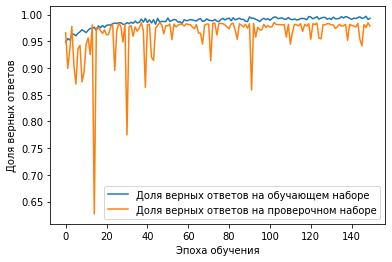

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(H.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(H.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


In [15]:
z = 0
c = []
for i in os.listdir('aaa/'):
    image = cv2.imread(f'aaa/{i}/{os.listdir(f"aut/{i}/")[4]}')
    x = image
    image = cv2.resize(image, (26, 28))
    x = image.astype("float") / 255.0

    x = x.reshape(1, 2184)
    prediction = model.predict(x)
    prediction = np.argmax(prediction)
    if class_names[prediction]==i :
        z+=1
        c.append(class_names[prediction])
    else:
        print(class_names[prediction], i, prediction)
print(z, c)

Fireball Firecracker 30
104 ['Witch', 'Princess', 'Skeleton_Barrel', 'Tombstone', 'Royal_Hogs', 'Ram_Rider', 'Bowler', 'Lightnimg', 'Electro_Spirit', 'Mother_Witch', 'Freeze', 'Giant', 'Archers', 'Skeleton_Dragons', 'Executiomer', 'Zap', 'Electro_Giant', 'Night_Witch', 'Heal_Spirit', 'Minion_Horde', 'Archer_Queen', 'Mortar', 'The_Log', 'Spear_Goblins', 'Fire_Spirit', 'Rocket', 'Lava_Hound', 'Ice_Spirit', 'Earthquake', 'Royal_Delivery', 'Arrows', 'Prince', 'Goblin_Gang', 'Graveyard', 'Knight', 'Tornado', 'Rascals', 'Royal_Ghost', 'Furnace', 'Cannon_Cart', 'Bats', 'Magic_Archer', 'Rage', 'Elixir_Collector', 'Tesla', 'Fisherman', 'Musketeer', 'Elite_Barbarians', 'Poison', 'Goblin_Hut', 'Dart_Goblin', 'Sparky', 'Minions', 'Battle_Healer', 'Fireball', 'Inferno_Tower', 'Barbarian_Hut', 'Zappies', 'Skeleton_Army', 'Giant_Snowball', 'Clone', 'Barbarian_Barrel', 'X-Bow', 'Golem', 'Hog_Rider', 'Valkyrie', 'Mini_PEKKA', 'Ice_Golem', 'Electro_Dragon', 'Goblin_Drill', 'Bomber', 'Wizard', 'Wall_Brea

In [16]:
z = 0
c = 0
for i in os.listdir('aaa/'):
    for j in os.listdir('aaa/'+i):
        image = cv2.imread("aaa/"+i+'/'+j)
        image = cv2.resize(image, (26, 28))
        x = image.astype("float") / 255.0
        x = x.reshape(1, 2184)
        prediction = model.predict(x)
        prediction = np.argmax(prediction)
        c += 1 
        if class_names[prediction]==i :
            z+=1
    print(c, z, i, class_names[prediction], prediction)
print(z, c)

95 94 Witch Witch 100
141 139 Princess Princess 76
230 228 Skeleton_Barrel Skeleton_Barrel 87
258 256 Tombstone Tombstone 96
328 326 Royal_Hogs Royal_Hogs 84
420 418 Ram_Rider Ram_Rider 78
512 510 Bowler Bowler 14
622 620 Lightnimg Lightnimg 60
649 646 Electro_Spirit Electro_Spirit 23
682 679 Mother_Witch Mother_Witch 70
712 709 Freeze Freeze 34
782 779 Giant Giant 37
854 851 Archers Archers 1
931 928 Skeleton_Dragons Skeleton_Dragons 88
1041 1038 Executiomer Executiomer 28
1079 1076 Zap Zap 103
1157 1154 Electro_Giant Electro_Giant 22
1284 1280 Night_Witch Night_Witch 72
1340 1335 Heal_Spirit Heal_Spirit 50
1395 1389 Minion_Horde Minion_Horde 67
1469 1463 Archer_Queen Archer_Queen 0
1519 1513 Mortar Mortar 69
1548 1542 The_Log The_Log 94
1585 1578 Spear_Goblins Spear_Goblins 92
1608 1601 Fire_Spirit Fire_Spirit 29
1734 1727 Rocket Rocket 80
1817 1809 Lava_Hound Lava_Hound 59
1845 1836 Ice_Spirit Ice_Spirit 54
1869 1858 Earthquake Earthquake 20
1937 1926 Royal_Delivery Royal_Delivery 8

In [17]:
model.save('CR.h5')

In [ ]:
from keras.models import load_model

model = load_model('CR.h5')
